<p align="center"><img  src="https://www.visioterra.fr/web/IMG/siteon0.png?1638355907"></p>

<h1 align="center"> VtWeb framework use case 1 WCS : San-Pédro flooding of 2021/07/01</h1>
<h2> Jupyter Notebook code example </h2>

This notebook will provide code example of the use of the VtWeb framework. Spécifically the WCS. <br/>
Feel free to use it as you desire.

## Table of contents:
0. [Use Case](#Use-Case)<br/>

1. [Getting geotiffs](#Getting-geotiffs)<br/>
    1.1 [Using python for comparison](#Using-python-for-comparison)<br/>
    1.2 [Using the POF-ML for comparison](#Using-the-POF-ML-for-comparison)<br/>

<h1 align="center">Use Case</h1>
<br/>The Sentinel-1 radar acquisition of 2021/07/01 show a flooding over San-Pédro, Ivory Coast.
<br/>We want to download geotiffs of the before and after for comparison purpose, and classify the flooding (either in python, or directly with the POF-ML language)
<br/>Down here are the two acquisition we want to work with captured on <a src="https://visioterra.org/VtWeb">vtweb</a>  :

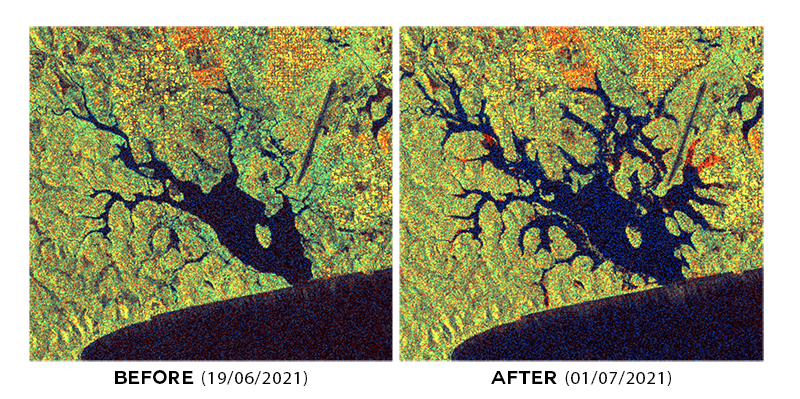

<h1 align="center">Getting geotiffs</h1>
<h2>Using python for comparison</h2>
<br/><b>For this part, we will use <span style="color:rgb(98, 191, 48);">Requests</span>/<span style="color:green;">maplotlib</span>/<span style="color:rgb(48,129,194);">PIL and numpy</span> to <span style="color:rgb(98, 191, 48);">download</span>, <span style="color:green;">show</span> and <span style="color:rgb(48,129,194);">manipulate</span> results </b>

In [1]:
import sys


In [2]:
# request is used for getting url responses & base64 for encoding informations in url
import requests
import base64


# matplotlib allow us to visualize responses
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#Allow manipulation of the responses
from PIL import Image
import numpy as np

<b>First, We define a <span style="color:blue;">function</span> that will allow us to construct a <span style="color:rgb(98, 191, 48);">download</span> request</b>

In [3]:
wcs_download_url = "https://visioterra.org/VtWeb/servlet/wcs/"
cws_get_capabilities = "?SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCapabilities"

def get_geotiff_request_url(module_id, dataset_id, granule_id, style, bbox):    
    
    request_arguments = "MODULEID="+module_id+\
    "&DATASETID="+dataset_id+\
    "&GRANULEID="+granule_id+\
    "&STYLE="+style
    #we encode our arguments in base64 in order to use it in our url
    urlToken = base64.b64encode(request_arguments.encode('utf-8')).decode(('utf-8'))
    
    wcs_arguments = "?SERVICE=WCS&VERSION=2.0.1"+\
    "&REQUEST=GetCoverage"+\
    "&COVERAGEID=coverageId"+\
    "&SUBSET=Lat("+str(bbox["lat0"])+","+str(bbox["lat1"])+")"+\
    "&SUBSET=Long("+str(bbox["lon0"])+","+str(bbox["lon1"])+")"+\
    "&FORMAT=image/tiff"

    
    request = wcs_download_url+urlToken+wcs_arguments

    return request

<b>Then, a <span style="color:blue;">function</span> to <span style="color:rgb(98, 191, 48);">download</span> the result of the request</b>

In [4]:
def download_geotiff(url, path):
    #we put the request response in r
    r = requests.get(url, stream=True, verify=True)
    # we open a file in the output path 
    f = open(path, 'wb')
    # we write in the file the content of the request
    f.write(r.content)
    # we close the file
    f.close()
    print(path+" has been downloaded")

In [5]:
def show_img_full_res(input_array, cmap="Null"):
    # Determine the figures size in inches to fit your image
    dpi = plt.rcParams['figure.dpi']
    height, width = input_array.shape
    figsize = width / float(dpi), height / float(dpi)

    plt.figure(figsize=figsize)
    
    if cmap != "Null" :
        plt.imshow(input_array, cmap= cmap, interpolation="none")
    else :
        plt.imshow(input_array, interpolation="none")

<b>Once all the functions are ready, we can <span style="color:rgb(98, 191, 48);">download</span> any data with the style we want<b>

In [6]:

#informations about the two products
date_1_module_id = "VtSentinelCsarDhus"
date_1_dataset_id = "Sentinel1A/CSAR/IW"
date_1_granule_id = "S1A_IW_GRDH_1SDV_20210619T184231_20210619T184256_038413_048869_772B"


date_2_module_id = "VtSentinelCsarDhus"
date_2_dataset_id = "Sentinel1A/CSAR/IW"
date_2_granule_id = "S1A_IW_GRDH_1SDV_20210701T184232_20210701T184257_038588_048DA4_30AD"


#informations common the two Sentinel
bbox = {"lon0":-6.715434741211,        
        "lon1":-6.6330372802735,
        "lat0":4.7107890594482,
        "lat1":4.7569230545044}

#pofml styles applied to both products to get ether vv or vh
vv_style = "sar(pp(s1cal(s1nc(band(QT_vv)),g0)),rasterCrsOrtho,cdem30,egm2008)" #gamma0 copernicus dem 30 geoide egm2008, thermal denoised, s1 cal
vh_style = "sar(pp(s1cal(s1nc(band(QT_vh)),g0)),rasterCrsOrtho,cdem30,egm2008)"

date_1_vv_request = get_geotiff_request_url(date_1_module_id, date_1_dataset_id, date_1_granule_id, vv_style, bbox)
date_1_vh_request = get_geotiff_request_url(date_1_module_id, date_1_dataset_id, date_1_granule_id, vh_style, bbox)
date_2_vv_request = get_geotiff_request_url(date_2_module_id, date_2_dataset_id, date_2_granule_id, vv_style, bbox)
date_2_vh_request = get_geotiff_request_url(date_2_module_id, date_2_dataset_id, date_2_granule_id, vh_style, bbox)

date_1_vv_name = "date_1_vv.tif"
date_1_vh_name = "date_1_vh.tif"
date_2_vv_name = "date_2_vv.tif"
date_2_vh_name = "date_2_vh.tif"

#we download the 4 geotiffs
download_geotiff(date_1_vv_request, date_1_vv_name)
download_geotiff(date_1_vh_request, date_1_vh_name)
download_geotiff(date_2_vv_request, date_2_vv_name)
download_geotiff(date_2_vh_request, date_2_vh_name)

date_1_vv.tif has been downloaded
date_1_vh.tif has been downloaded
date_2_vv.tif has been downloaded
date_2_vh.tif has been downloaded


<b> We will show the result as an array and as we can see, the data is in db</b>

In [7]:
im_1_vv = Image.open(date_1_vv_name)
imarray_1_vv = np.array(im_1_vv)

im_1_vh = Image.open(date_1_vh_name)
imarray_1_vh = np.array(im_1_vh)

print(imarray_1_vv)
print(imarray_1_vv[0][0])

[[-13.654493  -13.3469     -9.601296  ... -13.414546   -9.918287
  -11.4301605]
 [-12.905245  -10.26398    -9.601296  ... -11.369394  -10.839149
  -11.4301605]
 [ -9.4555025  -8.9857855  -9.455312  ... -11.369394  -15.013464
  -12.964988 ]
 ...
 [ -7.8817177  -8.20943    -7.7221475 ... -26.186237  -21.616556
  -17.100882 ]
 [ -8.506968   -7.336236   -7.7222433 ... -26.526903  -20.334206
  -16.103954 ]
 [-10.820474  -10.434275  -10.991158  ... -19.068665  -18.637775
  -18.22725  ]]
-13.654493


<b> I stretch my data between 0 and 255 for visualisation purpose</b>

In [8]:
imarray_1_vv_str = np.interp(imarray_1_vv, (-18, -3), (0, 255))
print(imarray_1_vv_str)
print(imarray_1_vv_str[0][0])

[[ 73.87361336  79.10270023 142.77796078 ...  77.95271778 137.38911629
  111.68727112]
 [ 86.61083794 131.5123415  142.77796078 ... 112.72029686 121.73445892
  111.68727112]
 [145.25645733 153.24164677 145.25969982 ... 112.72029686  50.77111244
   85.59520817]
 ...
 [172.01079941 166.4396944  174.7234931  ...   0.           0.
   15.2850132 ]
 [161.38155174 181.283988   174.72186375 ...   0.           0.
   32.23277664]
 [122.05194759 128.61733055 119.15032196 ...   0.           0.
    0.        ]]
73.87361335754395


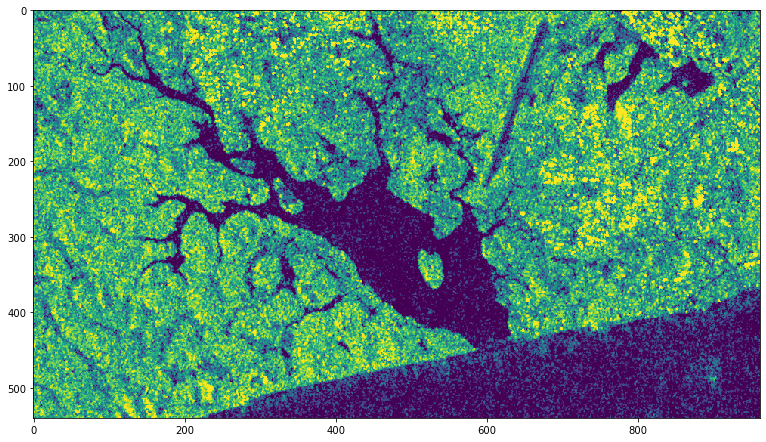

In [9]:
show_img_full_res(imarray_1_vv_str)

<b>Our data "before" seems ok, we will check the "after",
<br/>Its then up to us to do wathever we want with it.
<br/> Here, we want to do a comparison between the date 1 and the date 2 to classify <span style="color:rgb(120, 191, 48);">land</span>, <span style="color:rgb(48, 129, 194);">water</span> and <span style="color:rgb(255, 0, 0);">floodings</span></b>

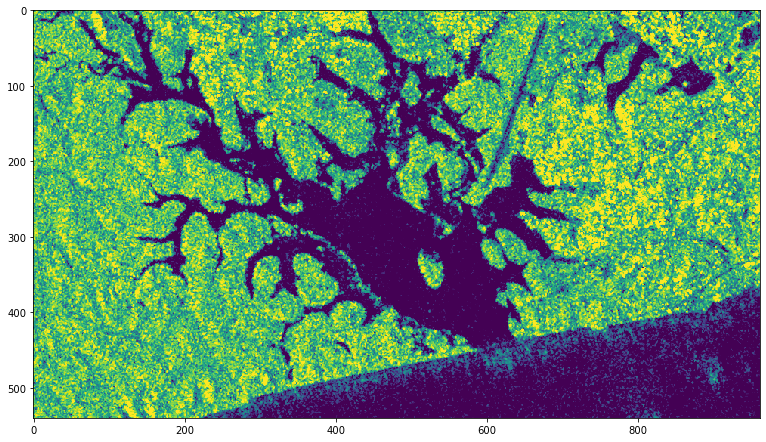

In [10]:
#verifying the 2nd date
im_2_vv = Image.open(date_2_vv_name)
imarray_2_vv = np.array(im_2_vv)

im_2_vh = Image.open(date_2_vh_name)
imarray_2_vh = np.array(im_2_vh)

imarray_2_vv_str = np.interp(imarray_2_vv, (-18, -3), (0, 255))
show_img_full_res(imarray_2_vv_str)

<b>After a little study on vv and vh bands, we can define a line under wich a pixel is defined as a water pixel (y=-1,5x-42)<br/>We define a <span style="color:blue;">function</span> to know if a pixel is <span style="color:rgb(48, 129, 194);">water</span></b>

In [11]:
def is_value_water(vv,vh):
    if( vh-((-1.4537*vv)-42.778))<0:
        return True
    return False

In [12]:
def classify_flooding(before_vv, before_vh, after_vv, after_vh):
    """"classify the zone where a flooding occured between 2 sent1 dates
    0=water
    1=drying
    2=flooding
    3=land
    """
    columns, lines = before_vv.shape
    #print(str(columns)+" "+str(lines))
    
    output_array = np.zeros( (columns,lines), dtype=np.uint8)
    #print(output_array.shape)
    
    #for every pixel
    for pos_y in range(0,lines):
        for pos_x in range(0,columns):
            #if the pixel before was water
            if is_value_water(before_vv[pos_x][pos_y], before_vh[pos_x][pos_y]) is True :
                #if pixel after is water, then its class is water
                if is_value_water(after_vv[pos_x][pos_y], after_vh[pos_x][pos_y]) is True :
                   output_array[pos_x][pos_y]=0 #pixel is water
                else:
                   output_array[pos_x][pos_y]=1 #pixel is drying
            else:
                if is_value_water(after_vv[pos_x][pos_y], after_vh[pos_x][pos_y]) is True :
                   output_array[pos_x][pos_y]=2 #pixel is flooding
                else:
                   output_array[pos_x][pos_y]=3 #pixel is land
                   
    return output_array

In [13]:
classif_array = classify_flooding(imarray_1_vv, imarray_1_vh, imarray_2_vv, imarray_2_vh)

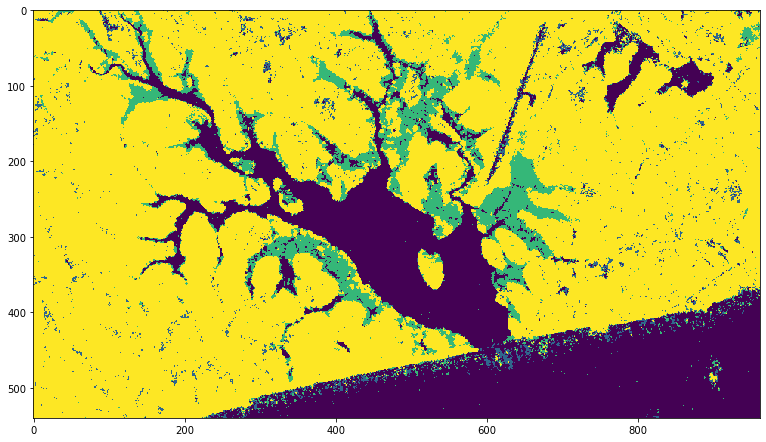

In [14]:
show_img_full_res(classif_array)

<b>We now create a colormap to see clearly what is happening in our result</b>

In [15]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 4))

#we set the colors that we will use
water = np.array([48/256, 129/256, 191/256, 1]) #sky blue
drying = np.array([234/256, 247/256, 168/256, 1]) #bright yellow
flooding = np.array([255/256, 0/256, 0/256, 1]) #red
land = np.array([120/256, 191/256, 48/256, 1]) #brown

#we assign them to the new color map
newcolors[0] = water
newcolors[1] = land
newcolors[2] = flooding
newcolors[3] = land
newcmp = ListedColormap(newcolors)

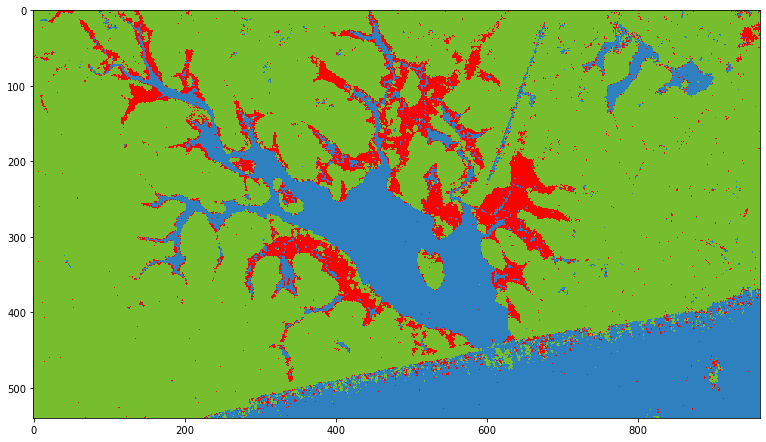

In [16]:
show_img_full_res(classif_array, cmap = newcmp)

#plt.imshow(classif_array, newcmp, interpolation="none")

<b>In conclusion, we have used the VtWeb framework to download calibrated data, and then used our own indicator coded in python. 
<br/>But the VtWeb framework also includes its own language to process the data and create indicators...</b>

<h2>Using the POF-ML for comparison</h2>
<br/><b>For this part, we will only use <span style="color:rgb(98, 191, 48);">Requests</span> and <span style="color:green;">maplotlib</span> to <span style="color:rgb(98, 191, 48);">download</span> and <span style="color:green;">show</span> results 
<br/>
<br/>First, as we want to compare multiple products, we have to make our request in a way that will allow us to select multiple products in the POF_ML_Style</b>

In [17]:
wcs_download_url = "https://visioterra.org/VtWeb/servlet/wcs/"
cws_get_capabilities = "?SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCapabilities"

def get_geotiff_request_url_v2(granules, style, bbox):
    
    request_arguments = "&GRANULES="+granules+\
    "&STYLE="+style
    
    #we encode our arguments in base64 in order to use it in our url
    urlToken = base64.b64encode(request_arguments.encode('utf-8')).decode(('utf-8'))
    
    wcs_arguments = "?SERVICE=WCS&VERSION=2.0.1"+\
    "&REQUEST=GetCoverage"+\
    "&COVERAGEID=coverageId"+\
    "&SUBSET=Lat("+str(bbox["lat0"])+","+str(bbox["lat1"])+")"+\
    "&SUBSET=Long("+str(bbox["lon0"])+","+str(bbox["lon1"])+")"+\
    "&FORMAT=image/tiff"

    
    request = wcs_download_url+urlToken+wcs_arguments

    return request

Instead of using <b>&moduleid</b>, <b>&granuleid</b> and <b>&datasetid</b> to set a product, we use <b><span style="color:rgb(255, 0, 0);">&granules</span></b> with the following synthax : 
<br/><br/><b>mid</b> is the module id
<br/><b>did</b> is the dataset id
<br/><b>gid</b> is the granule id
<br/><br/> mid and did are reused for all the products util their is another mid and did defined

In [18]:
granules='[\
   {\
      "mid":"VtSentinelCsarDhus",\
      "did":"Sentinel1A/CSAR/IW",\
      "gid":"S1A_IW_GRDH_1SDV_20210619T184231_20210619T184256_038413_048869_772B"\
   },\
   {\
      "gid":"S1A_IW_GRDH_1SDV_20210701T184232_20210701T184257_038588_048DA4_30AD"\
   }\
]'

In [19]:
def get_vv(date_number):
    """Style used to get the vv of the date_number product in the granules"""
    return "sarf(pp(s1cal(s1nc(band("+str(date_number)+":QT_vv)),b0,0)),"+str(date_number)+":rasterCrsOrtho,cdem30,egm2008,1,0)"

def get_vh(date_number):
    """Style used to get the vh of the date_number product in the granules"""
    return "sarf(pp(s1cal(s1nc(band("+str(date_number)+":QT_vh)),b0,0)),"+str(date_number)+":rasterCrsOrtho,cdem30,egm2008,1,0)"

def get_diff_flooding(date_number):
    """Style used to get the vh of the date_number product in the granules"""
    return "dif(poly("+get_vv(date_number)+",-42.7778,-1.4537),"+get_vh(date_number)+")"


style_inondation = "if(if(lvl("+get_diff_flooding(0)+",nn,13),gt,0,uint(255),uint(1)),eq,255,if(if(lvl("+get_diff_flooding(1)+",nn,13),gt,0,uint(255),uint(1)),eq,255,uint(0),uint(1)),if(if(lvl("+get_diff_flooding(1)+",nn,13),gt,0,uint(255),uint(1)),eq,255,uint(2),uint(3)))"

In [20]:
pof_tiff_request = get_geotiff_request_url_v2(granules=granules, style=style_inondation, bbox=bbox)

In [22]:
download_geotiff(pof_tiff_request, "pof_ml_wcs_example.tiff")

pof_ml_wcs_example.tiff has been downloaded


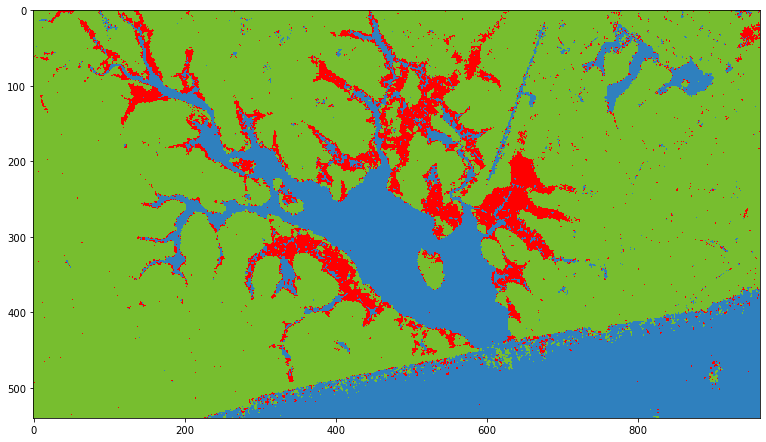

In [23]:
pof_ml_example = Image.open("pof_ml_wcs_example.tiff")
pof_ml_example_array = np.array(pof_ml_example)
show_img_full_res(pof_ml_example_array, cmap = newcmp)
